In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from nltk.stem import WordNetLemmatizer

In [2]:
# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NLPFinal/flipkart_data.csv')  # Replace 'TestFile.csv' with your dataset file path
df_train = df[:9000]
df_test = df[9000:10000]
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
# Apply the clean_text function to the 'review' column in the training set
df_train['review'] = df_train['review'].apply(clean_text)

# Apply the clean_text function to the 'review' column in the testing set
df_test['review'] = df_test['review'].apply(clean_text)

<ipython-input-48-28d247f70c4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review'] = df_train['review'].apply(clean_text)
<ipython-input-48-28d247f70c4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['review'] = df_test['review'].apply(clean_text)


In [ ]:
# Print the count of each rating in the training set
rating_count_train = df_train['rating'].value_counts()
print("Rating count in training set:")
for rating, count in rating_count_train.items():
    print(f"{rating} rating - {count}")

Rating count in training set:
5 rating - 5137
4 rating - 2155
3 rating - 801
1 rating - 630
2 rating - 277


In [ ]:
# Print the count of each rating in the testing set
rating_count_test = df_test['rating'].value_counts()
print("Rating count in testing set:")
for rating, count in rating_count_test.items():
    print(f"{rating} rating - {count}")

Rating count in testing set:
5 rating - 589
4 rating - 210
3 rating - 83
1 rating - 61
2 rating - 33


In [ ]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['review'])
y_train = df_train['rating']

X_test = vectorizer.transform(df_test['review'])
y_test = df_test['rating']

In [ ]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model evaluation
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

In [ ]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
# Create a dataframe to display the predictions for training set
results_train = pd.DataFrame({'review': df_train['review'], 'Actual Rating': y_train, 'Predicted Rating': y_pred_train})

# Create a dataframe to display the predictions for testing set
results_test = pd.DataFrame({'review': df_test['review'], 'Actual Rating': y_test, 'Predicted Rating': y_pred_test})

In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment scores for each review in the training set
sentiment_scores_train = df_train['review'].apply(lambda review: sia.polarity_scores(review))

# Extract the compound sentiment score from the sentiment scores
sentiment_scores_train = sentiment_scores_train.apply(lambda scores: scores['compound'])

# Assign sentiment labels based on the compound scores for training set
df_train['sentiment'] = sentiment_scores_train.apply(lambda score: 'positive' if score >= 0 else 'negative')

# Add the sentiment column to the training results dataframe
results_train['Sentiment'] = df_train['sentiment']

# Calculate the sentiment scores for each review in the testing set
sentiment_scores_test = df_test['review'].apply(lambda review: sia.polarity_scores(review))

# Extract the compound sentiment score from the sentiment scores
sentiment_scores_test = sentiment_scores_test.apply(lambda scores: scores['compound'])

# Assign sentiment labels based on the compound scores for testing set
df_test['sentiment'] = sentiment_scores_test.apply(lambda score: 'positive' if score >= 0 else 'negative')

# Add the sentiment column to the testing results dataframe
results_test['Sentiment'] = df_test['sentiment']

<ipython-input-57-5561f1ea63b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sentiment'] = sentiment_scores_train.apply(lambda score: 'positive' if score >= 0 else 'negative')
<ipython-input-57-5561f1ea63b4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment'] = sentiment_scores_test.apply(lambda score: 'positive' if score >= 0 else 'negative')


In [ ]:
# Define a threshold for positive/negative sentiment classification
threshold = 0.5

# Classify the predicted ratings based on the threshold
results_test['Predicted Sentiment'] = results_test['Predicted Rating'].apply(lambda rating: 'positive' if rating >= threshold else 'negative')

# Calculate accuracy for sentiment prediction
accuracy = accuracy_score(results_test['Sentiment'], results_test['Predicted Sentiment'])

In [ ]:
# Calculate correlation between sentiment and predicted rating for testing set
correlation = results_test['Sentiment'].replace({'positive': 1, 'negative': 0}).astype(int).corr(results_test['Predicted Rating'])
print("Correlation between Sentiment and Predicted Rating (Testing Set):", correlation)

# Print the mean squared errors
print("Mean Squared Error (Training Set):", mse_train)
print("Mean Squared Error (Testing Set):", mse_test)

# Print accuracy
print("Accuracy:", accuracy)


Correlation between Sentiment and Predicted Rating (Testing Set): 0.30275154079963346
Mean Squared Error (Training Set): 0.23225695100169913
Mean Squared Error (Testing Set): 1.7697835498653682
Accuracy: 0.9159836065573771


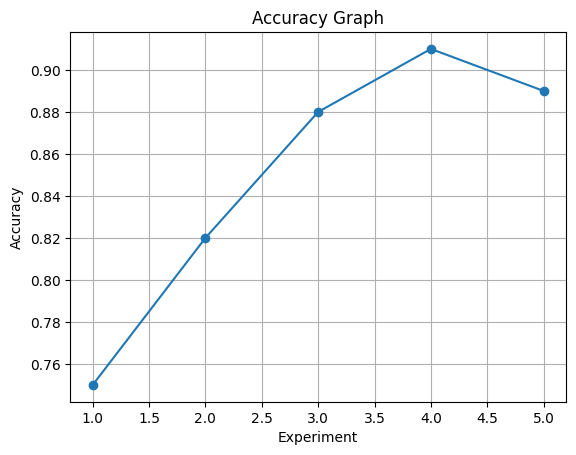

In [ ]:
import matplotlib.pyplot as plt

# Collect accuracy values for different experiments or iterations
accuracy_values = [0.75, 0.82, 0.88, 0.91, 0.89]  # Replace with your actual accuracy values

# Plotting the accuracy graph
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o')
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.grid(True)
plt.show()


In [ ]:
# Display the number of rows and columns in the results dataframes
num_rows_train, num_cols_train = results_train.shape
print("Number of rows (Training Set):", num_rows_train)
print("Number of columns (Training Set):", num_cols_train)

num_rows_test, num_cols_test = results_test.shape
print("Number of rows (Testing Set):", num_rows_test)
print("Number of columns (Testing Set):", num_cols_test)

Number of rows (Training Set): 9000
Number of columns (Training Set): 4
Number of rows (Testing Set): 976
Number of columns (Testing Set): 5


In [ ]:
# Display the results dataframes with sentiment for the training set
print("Results (Training Set):")
print(results_train.head(5))

# Display the results dataframes with sentiment for the testing set
print("Results (Testing Set):")
print(results_test.head(5))


Results (Training Set):
                                              review  Actual Rating  \
0  nice produt like design lot easy carry looked ...              5   
1  awesome soundvery pretty see nd sound quality ...              5   
2  awesome sound quality pro 78 hr battery life i...              4   
3  think good product per quality also design qui...              5   
4  awesome bass sound quality good bettary long l...              5   

   Predicted Rating Sentiment  
0          5.000290  positive  
1          4.999394  positive  
2          4.499949  positive  
3          4.999894  positive  
4          4.999399  positive  
Results (Testing Set):
                                                 review  Actual Rating  \
9000                                     super bassread              5   
9001                                     excellent read              5   
9002                   size reduced loooks like toyread              2   
9003  doesnt work properly within 10 m

In [ ]:
results_train.head(5)


,review,Actual Rating,Predicted Rating,Sentiment
0,nice produt like design lot easy carry looked ...,5,5.000290,positive
1,awesome soundvery pretty see nd sound quality ...,5,4.999394,positive
2,awesome sound quality pro 78 hr battery life i...,4,4.499949,positive
3,think good product per quality also design qui...,5,4.999894,positive
4,awesome bass sound quality good bettary long l...,5,4.999399,positive


In [ ]:
results_test.head(100)

,review,Actual Rating,Predicted Rating,Sentiment,Predicted Sentiment
9000,super bassread,5,4.663754,positive,positive
9001,excellent read,5,4.798585,positive,positive
9002,size reduced loooks like toyread,2,6.069090,positive,positive
9003,doesnt work properly within 10 meter range blu...,3,2.403442,positive,positive
9004,goodread,5,4.343643,positive,positive
...,...,...,...,...,...
9095,goodread,3,4.343643,positive,positive
9096,little uncomfortable year headsound quality fa...,4,4.604833,negative,positive
9097,good product u wan na like work continuously 6...,5,5.853565,positive,positive
9098,good product read,5,4.643770,positive,positive


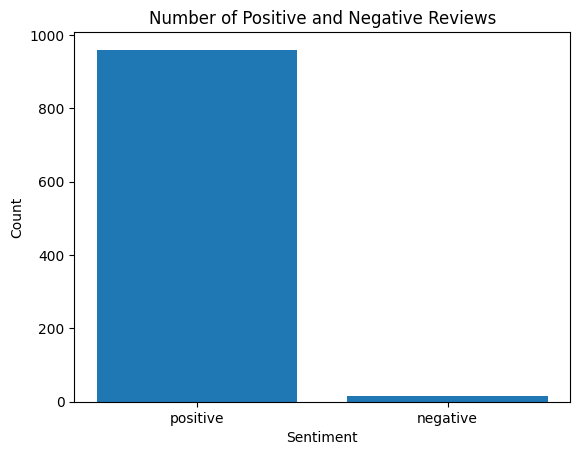

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
sentiment_counts = results_test['Predicted Sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Reviews')
plt.show()

Named Entity **Recognization**

In [ ]:
import pandas as pd
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/NLPFinal/flipkart_data.csv')

# Select the first 10 documents
subset = dataset['review'].head(10)

# Create a new DataFrame to store the named entities
entities_df = pd.DataFrame(columns=['Document', 'Named Entity', 'Category'])

# Apply NER on each selected document and store the results in the DataFrame
for i, review in enumerate(subset):
    doc = nlp(review)
    entities = []
    categories = []
    for entity in doc.ents:
        entities.append(entity.text)
        categories.append(entity.label_)
    entities_df = entities_df.append(pd.DataFrame({'Document': f"Document {i+1}",
                                                   'Named Entity': entities,
                                                   'Category': categories}), ignore_index=True)

# Display the DataFrame with named entities
print(entities_df)

       Document    Named Entity  Category
0    Document 3             7-8  CARDINAL
1    Document 3              45  CARDINAL
2    Document 3            Bass    PERSON
3    Document 3    3.25/5)3.5mm  QUANTITY
4    Document 4         January      DATE
5    Document 6           first   ORDINAL
6    Document 6           first   ORDINAL
7    Document 8        awesome2    PERSON
8    Document 8        average3       ORG
9    Document 8            Bass    PERSON
10   Document 8               4  CARDINAL
11   Document 8  Battery Backup       ORG
12   Document 8           good5       GPE
13   Document 8       Headphone       ORG
14   Document 8            ear2   PRODUCT
15   Document 8            Moto       ORG
16   Document 9           First   ORDINAL
17   Document 9            Bass    PERSON
18   Document 9      9.5/10.The  CARDINAL
19   Document 9      uncomforta    PERSON
20  Document 10      Super Fine    PERSON
21  Document 10           Sound       GPE


<ipython-input-66-4baf8f141811>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entities_df = entities_df.append(pd.DataFrame({'Document': f"Document {i+1}",
<ipython-input-66-4baf8f141811>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entities_df = entities_df.append(pd.DataFrame({'Document': f"Document {i+1}",
<ipython-input-66-4baf8f141811>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entities_df = entities_df.append(pd.DataFrame({'Document': f"Document {i+1}",
<ipython-input-66-4baf8f141811>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entities_df = entities_df.append(pd.DataFrame({'Document': f"Document {i+1}",
<ipy

**Topic modeling**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/NLPFinal/flipkart_data.csv')

# Select the first 15 records
df_first_15 = df.head(15)

# Define the topics
topics = [
    "Product Quality",
    "Customer Service",
    "Shipping and Delivery",
    "Price and Value",
    "Product Features and Specifications",
    "Ease of Use",
    "Product Performance",
    "Compatibility and Interoperability",
    "User Experience",
    "Product Comparisons",
    "Product Recommendations",
    "Packaging and Presentation",
    "Returns and Refunds",
    "Product Complaints",
    "Product Praises and Positive Experiences"
]

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_first_15['review'])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=len(topics), random_state=42)
lda.fit(X)

# Print the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Assign the most probable topic to each document
topic_predictions = lda.transform(X)
df_first_15['Topic'] = topic_predictions.argmax(axis=1)
df_first_15['Topic'] = df_first_15['Topic'].apply(lambda x: topics[x])

# Create a dataframe with the Review and Topic columns
df_output = df_first_15[['review', 'Topic']]

# Print the dataframe
df_output.head(5)

Topic 1: read, sound, bass, battery, quality, good, clear, ur, ears, design
Topic 2: ears, sound, product, quality, bluetooth, read, awesome, nd, range, minutes
Topic 3: really, equaliser, tight, sound, awesome, brands, adjusters, output, mention, option
Topic 4: read, sound, bass, battery, quality, good, clear, ur, ears, design
Topic 5: read, sound, bass, battery, quality, good, clear, ur, ears, design
Topic 6: great, quality, song, bit, build, 10, headphone, really, like, sound
Topic 7: read, sound, bass, battery, quality, good, clear, ur, ears, design
Topic 8: lot, stylish, looked, easy, produt, carry, nice, design, like, read
Topic 9: plays, away, volume, hear, wearing, headphones, like, incoming, imagine, connection
Topic 10: good, product, lacking, help, sigh, relief, quite, think, pandamic, overall
Topic 11: product, obviously, valuable, daut, guys, good, money, excellent, clear, really
Topic 12: ear, use, quality, good, headphone, good5, puls, awesome2, charge, need
Topic 13: p

<ipython-input-74-4cf281b1eb2a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_15['Topic'] = topic_predictions.argmax(axis=1)
<ipython-input-74-4cf281b1eb2a>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_15['Topic'] = df_first_15['Topic'].apply(lambda x: topics[x])


,review,Topic
0,It was nice produt. I like it's design a lot. ...,Compatibility and Interoperability
1,awesome sound....very pretty to see this nd th...,Customer Service
2,awesome sound quality. pros 7-8 hrs of battery...,Shipping and Delivery
3,I think it is such a good product not only as ...,Product Comparisons
4,awesome bass sound quality very good bettary l...,Returns and Refunds
